# Predicting House Prices Exercise

## Building a neural network.

In [1]:
from tensorflow.keras import layers, models


def build_model(hidden_layers):

    model = models.Sequential()

    model.add(
        layers.Dense(
            hidden_layers[0], activation="relu", input_shape=(train_data.shape[1],)
        )
    )
    model.add(layers.Dense(hidden_layers[1], activation="relu"))
    model.add(layers.Dense(hidden_layers[2]))

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

    return model

## Plotting accuracy and loss

In [2]:

def plot_accuracy(acc, val_acc, savepath="figure1.png"):

    import matplotlib.pyplot as plt

    plt.clf()

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, "r-", label="Accuracy")
    plt.plot(epochs, val_acc, "r", label="Validation Accuracy")

    plt.axis([0, len(acc) + 1, min(acc) - 0.05, max(acc) + 0.05])
    plt.title("Mean Average Error v. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    savepath = "test_res/accuracy/" + savepath
    plt.savefig(savepath)
    plt.show()
    plt.clf()


def plot_loss(loss, val_loss, savepath="figure1.png"):

    import matplotlib.pyplot as plt

    plt.clf()

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.plot(epochs, loss, "b-", label="Loss")

    plt.axis([0, len(loss) + 1, min(loss) - 0.05, max(loss) + 0.05])
    plt.title("Mean Square Difference v. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    savepath = "test_res/loss/" + savepath
    plt.savefig(savepath)
    plt.show()
    plt.clf()

## Standartizing the data

In [3]:
import numpy as np

def standardize(train_data):

    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    standardized_data = train_data / std

    return standardized_data

## Main code using k-fold cross-validation

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


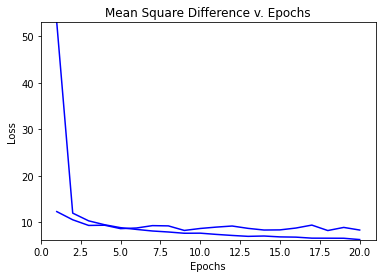

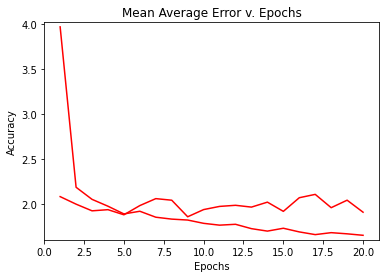

4/4 [==============================] - 0s 1ms/step - loss: 14.9216 - mae: 2.4848
[14.921602249145508, 2.484811782836914]


<Figure size 432x288 with 0 Axes>

In [4]:
from tensorflow.keras.datasets import boston_housing


(train_data, train_labels) = boston_housing.load_data()[0]


train_data = standardize(train_data)

k = 4
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores_mae = []
all_scores_mse = []

all_scores_Vmae = []
all_scores_Vmse = []

hidden_layers = [64, 64, 1]
network = build_model(hidden_layers)

for i in range(k):
    print("Processing fold #", i)

    val_train_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples : (i + 1) * num_val_samples]

    part_train_data = np.concatenate(
        [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]],
        axis=0,
    )

    part_train_targets = np.concatenate(
        [
            train_labels[: i * num_val_samples],
            train_labels[(i + 1) * num_val_samples :],
        ],
        axis=0,
    )

    history = network.fit(
        part_train_data,
        part_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
        validation_data=(val_train_data, val_targets),
    )

    val_mse, val_mae, mse, mae = (
        history.history["val_loss"],
        history.history["val_mae"],
        history.history["loss"],
        history.history["mae"],
    )

    all_scores_mae.append(mae)
    all_scores_mse.append(mse)

    all_scores_Vmae.append(val_mae)
    all_scores_Vmse.append(val_mse)

average_mae = [np.mean([x[i] for x in all_scores_mae]) for i in range(num_epochs)]
average_mse = [np.mean([x[i] for x in all_scores_mse]) for i in range(num_epochs)]

average_Vmae = [np.mean([x[i] for x in all_scores_Vmae]) for i in range(num_epochs)]
average_Vmse = [np.mean([x[i] for x in all_scores_Vmse]) for i in range(num_epochs)]

architecture = "input()-" + "-".join(map(str, hidden_layers)) + ".png"

plot_loss(average_mse, average_Vmse, savepath=architecture)
plot_accuracy(average_mae, average_Vmae, savepath=architecture)


(test_data, test_labels) = boston_housing.load_data()[1]

test_data = standardize(test_data)

print(network.evaluate(test_data, test_labels))
